In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder

In [18]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [19]:
df = pd.read_csv("./magic04.data", names= cols) #read csv 
df['class'] = (df['class'] == 'g').astype(int) # assign 1 to all g, 0 to h
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  


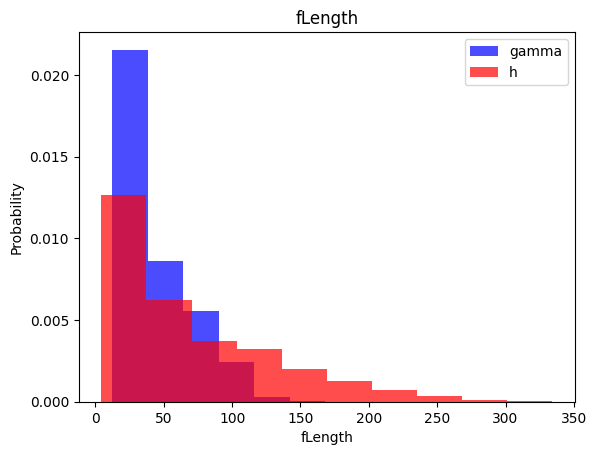

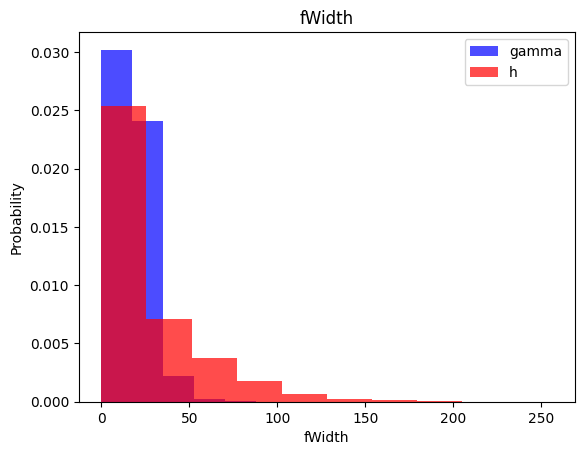

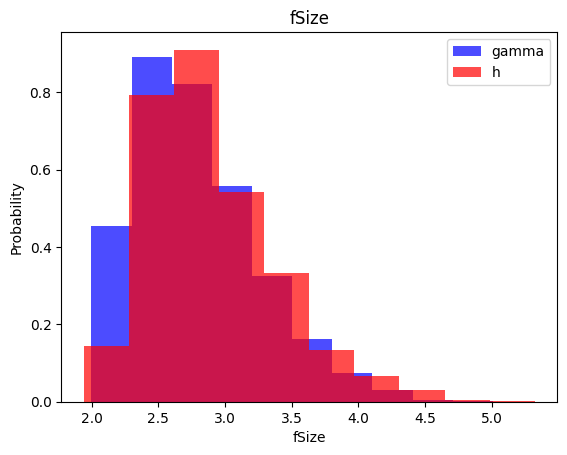

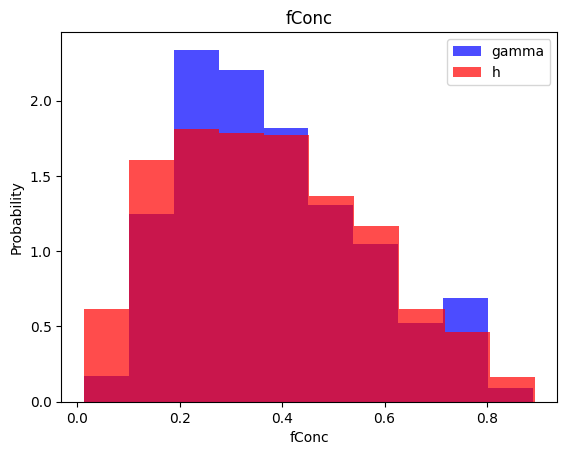

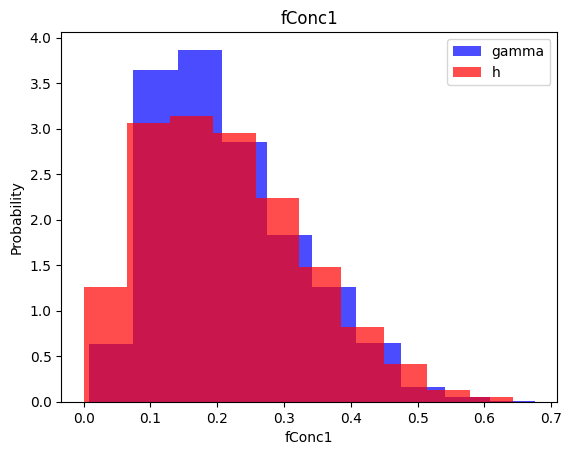

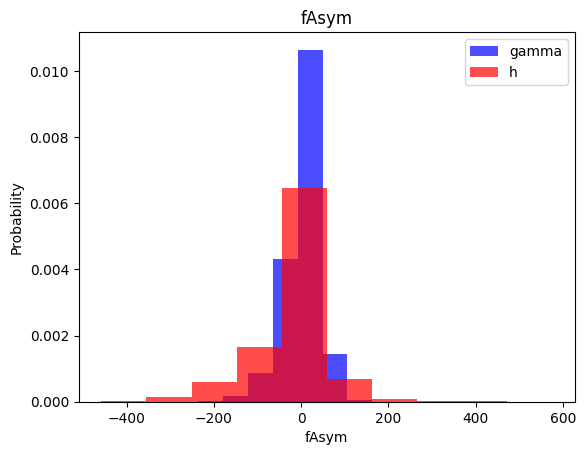

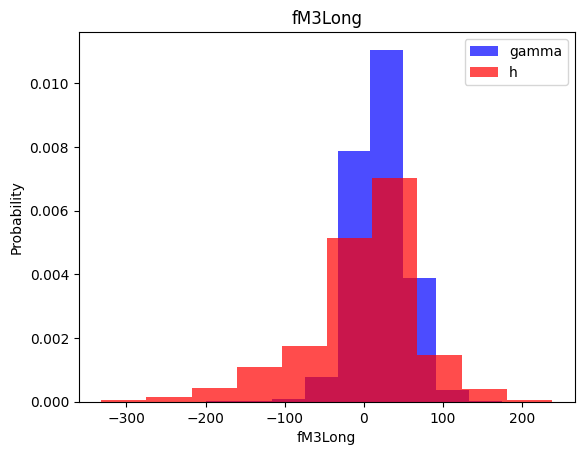

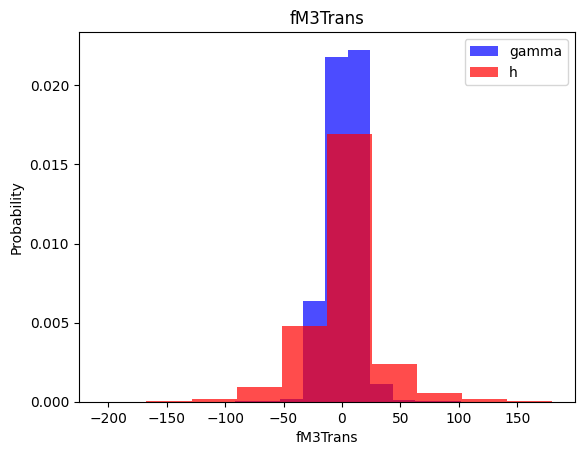

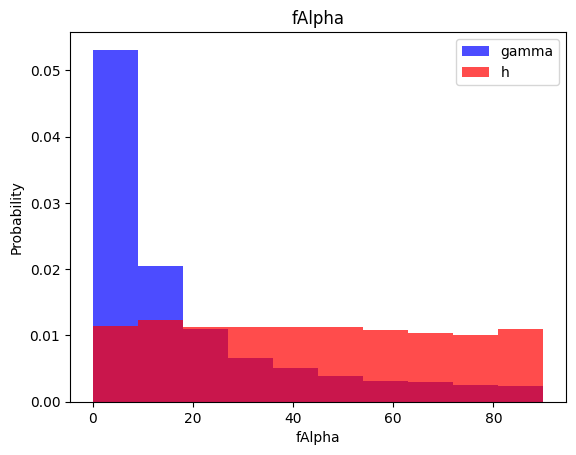

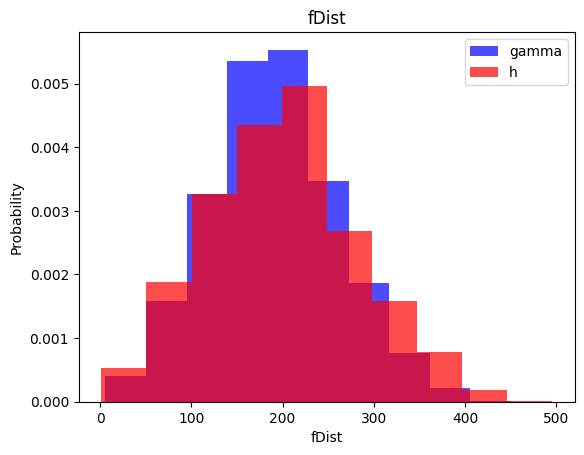

In [20]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='h', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

To create datasets train, validation, test datasets <br>
ataFrame. sample - Возврат случайной выборки элементов с оси объекта

In [21]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # split mean to split the df to [:int(0.6*len(df))], 
#[int(0.6*len(df)):int(0.8*len(df))], [int(0.8*len(df)):]

In [22]:
print("len(df) - ", len(df), "len(train) - ", len(train), "len(valid) - ", len(valid), "len(test) - ", len(test))

len(df) -  19020 len(train) -  11412 len(valid) -  3804 len(test) -  3804


In [23]:
def scale_dataframe(dataframe, oversample=False): #some of the values are small , and as I understand to scale these values 
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
    data = np.hstack((X, np.reshape(y, (-1, 1)))) # воссоединение исходниго набора данных, (-1,1) == (2,1)
    return data, X, y

In [24]:
train, X_train, y_train = scale_dataframe(train, oversample=True)
valid, X_valid, y_valid = scale_dataframe(valid, oversample=False)
test, X_test, y_test = scale_dataframe(test, oversample=False)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn_model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      2476
           1       0.76      0.86      0.80      2476

    accuracy                           0.79      4952
   macro avg       0.80      0.79      0.79      4952
weighted avg       0.80      0.79      0.79      4952



Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56      2476
           1       0.61      0.91      0.73      2476

    accuracy                           0.66      4952
   macro avg       0.71      0.66      0.64      4952
weighted avg       0.71      0.66      0.64      4952



Neural network